# K-means Algorithm

---

Data clustering is one of the main mathematical applications variety of algorithms have been developed to tackle the problem. K-means is one of the basic algorithms for data clustering.

## Prerequisites

The reader should be familiar with basic linear algebra. 
 
## Competences 

The reader should be able to recognise applications where K-means algorithm can be efficiently used and use it.

__Credits__: The notebook is based on [I. Mirošević, Spectral Graph Partitioning and Application to Knowledge Extraction][Mir05].

[Mir05]: #1 "I. Mirošević, 'Spectral Graph Partitioning and Application to Knowledge Extraction', M.Sc. Thesis, Iniversity of Zagreb, 2005 (in Croatian)." 

---

## Definitions

__Data clustering problem__ is the following: partition the given set of $m$ objects of the same type into $k$ subsets according to some criterion. Additional request may be to find the optimal $k$.

__K-means clustering problem__ is the following: 
partition the set  $X=\{x_{1},x_{2},\cdots ,x_{m}\}$ , where $x_{i}\in\mathbb{R}^{n}$, into $k$ __clusters__ $\pi=\{C_{1},C_{2},...,C_{k}\}$ such that
$$
J(\pi)=\sum_{i=1}^{k}\sum_{x\in
C_{i}}\| x-c_{i}\|_{2}^{2} \to \min
$$
over all possible partitions. Here
$c_{i}=\displaystyle\frac{1}{|C_{i}|}\sum_{x\in C_{i}} x$ is the mean of points in $C_i$ and $|C_i|$ is the cardinality of $C_i$.

__K-means clustering algorithm__ is the following:
1. _Initialization_: Choose initial set of $k$ means $\{c_1,\ldots,c_k\}$ (for example, by choosing randomly $k$ points from $X$).
2. _Assignment step_: Assign each point $x$ to one nearest mean $c_i$.
3. _Update step_: Compute the new means.
4. _Convergence_: Repeat Steps 2 and 3 until the assignment no longer changes.

A __first variation__ of a partition $\pi=\{C_1,\ldots,C_k\}$ is 
a partition $\pi^{\prime}=\{C_{1}^{\prime},\cdots ,C_{k}^{\prime }\}$ 
obtained by moving a single point $x$ from a cluster  $C_{i}$ to a cluster $C_{j}$. Notice that $\pi$ is a first variation of itself.

A __next partition__ of the partition $\pi$ is a partition 
$next(\pi)=\mathop{\mathrm{arg min}}\limits_{\pi^{\prime}} J(\pi^{\prime})$.

__First Variation clustering algorithm__ is the following:
1. Choose initial partition $\pi$.
2. Compute $next(\pi)$
3. If $J(next(\pi))<J(\pi)$, set $\pi=next(\pi)$ and go to Step 2
4. Stop.

## Facts

1. The k-means clustering problem is NP-hard.

2. In the k-means algorithm, $J(\pi)$ decreases in every iteration.

3. K-means algorithm can converge to a local minimum.

4. Each iteration of the k-means algorithm requires $O(mnk)$ operations.

4. K-means algorithm is implemented in the function `kmeans()` in the package [Clustering.jl](https://github.com/JuliaStats/Clustering.jl).

5. $J(\pi)=\mathop{\mathrm{trace}}(S_W)$, where
$$
S_{W}=\sum\limits_{i=1}^k\sum\limits_{x\in C_{i}}
(x-c_i)(x-c_{i})^{T}
=\sum_{i=1}^k\frac{1}{2|C_{i}|}\sum_{x\in C_{i}}\sum_{y \in C_{i}}
(x-y)(x-y)^{T}.
$$
Let $c$ denote the mean of $X$. Then $S_W=S_T-S_B$, where
\begin{align*}
S_{T}&=\sum_{x\in X}(x-c)(x-c)^{T} = 
\frac{1}{2m}\sum_{i=1}^m\sum_{j=1}^m
(x_{i}-x_{j})(x_{i}-x_{j})^{T}, \\
S_{B}&=\sum_{i=1}^k|C_{i}|(c_{i}-c)(c_{i}-c)^{T} =
\frac{1}{2m}\sum_{i=1}^k\sum_{j=1}^k|C_{i}||C_{j}|
(c_{i}-c_{j})(c_{i}-c_{j})^{T}.
\end{align*}

6. In order to try to avoid convergence to local minima, the k-means algorithm can be enhanced with first variation by adding the following steps:
    1. Compute $next(\pi)$. 
    2. If $J(next(\pi))<J(\pi)$, set $\pi=next(\pi)$ and go to Step 2.
     

### Example - Random clusters

We generate $k$ random clusters around points with integer coordinates.

In [1]:
function myKmeans{T}(X::Array{T}, k::Int64)
    # X is Array of Arrays
    m,n=length(X),length(X[1])
    C=Array(Int64,m)
    # Choose random k means among X
    c=X[randperm(m)[1:k]]
    # This is just to start the while loop
    cnew=copy(c)
    cnew[1]=cnew[1]+[1.0;1.0]
    # Loop
    iterations=0
    while cnew!=c
        iterations+=1
        cnew=copy(c)
        # Assignment
        for i=1:m
            C[i]=findmin([norm(X[i]-c[j]) for j=1:k])[2]
        end
        # Update
        for j=1:k
            c[j]=mean(X[C.==j])
        end
    end
    C,c,iterations
end

myKmeans (generic function with 1 method)

In [2]:
# Pkg.checkout("Winston")
using Winston
using Colors

In [3]:
# Generate points 
k=5
centers=rand(-5:5,k,2)
# Number of points in cluster
sizes=rand(10:50,k)
# X is array of arrays
X=Array(Array{Float64,1},sum(sizes))
first=0
last=0
for j=1:k
    first=last+1
    last=last+sizes[j]
    for i=first:last
        X[i]=map(Float64,vec(centers[j,:])+(rand(2)-0.5)/2)
    end
end
centers, sizes

(
[2 2; 4 0; … ; 1 5; -4 -3],

[29,21,36,34,13])

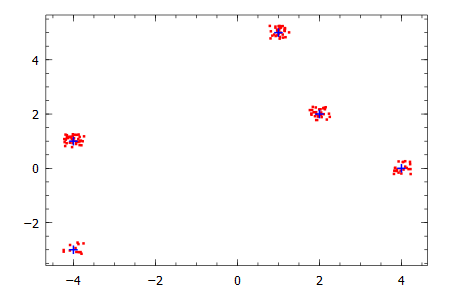

In [4]:
# Prepare for plot
function extractxy(X::Array)
    x=map(Float64,[X[i][1] for i=1:length(X)])
    y=map(Float64,[X[i][2] for i=1:length(X)])
    x,y
end
x,y=extractxy(X)
plot(x,y,"r.",centers[:,1],centers[:,2],"b+")

In [5]:
# Plot the solution
function plotKmeansresult(C::Array,c::Array,X::Array)
    p=FramedPlot()
    x,y=extractxy(X)
    # Custers
    for j=1:k
        # Random color
        col=RGB(rand(),rand(),rand())
        p1=Points(x[find(C.==j)],y[find(C.==j)],
        "color",col,symbolkind="dot")
        add(p,p1)
    end
    # Means
    cx,cy=extractxy(c)
    p2=Points(cx,cy,color="red",symbolkind="plus")
    add(p,p2)
end

plotKmeansresult (generic function with 1 method)

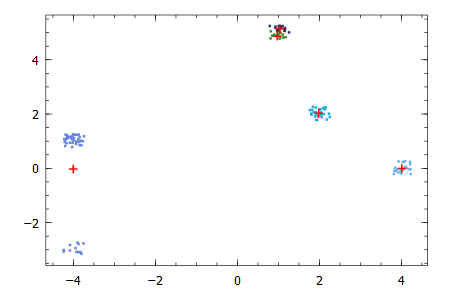

In [6]:
# Cluster the data, repeat several times
C,c,iterations=myKmeans(X,k)
plotKmeansresult(C,c,X)

__What happens?__

We see that the algorithm, although simple, for this example 
converges to a local minimum.

Let us try the function `kmeans()` from the package `Clustering.jl`.
In this function, the inpout is a matrix where columns are points, number of cluster we are looking for, and, optionally, the method to compute initial means. 

If we choose `init=:rand`, the results are similar. If we choose
`init=:kmpp`, wjich is the default, the results are better, but convergence to a local minimum is still possible.

_Run the clustering several times!_

```
seeding_algorithm(s::Symbol) = 
    s == :rand ? RandSeedAlg() :
    s == :kmpp ? KmppAlg() :
    s == :kmcen ? KmCentralityAlg() :
    error("Unknown seeding algorithm $s")
```

In [7]:
# Pkg.add("Clustering")
using Clustering

In [8]:
methods(kmeans)

# 1 method for generic function "kmeans":
kmeans(X::Array{T<:Any,2}, k::Int64; weights, init, maxiter, tol, display) at C:\Users\Ivan\.julia\v0.5\Clustering\src\kmeans.jl:49

In [9]:
X1=[x y]'
out=kmeans(X1,k,init=:kmpp)

Clustering.KmeansResult{Float64}([4.00796 -4.01962 … 1.98278 -3.96558; -0.00437045 1.04344 … 2.03143 -2.99277],[4,4,4,4,4,4,4,4,4,4  …  5,5,5,5,5,5,5,5,5,5],[0.0983861,0.0167583,0.0897454,0.0617613,0.0761181,0.038287,0.00794343,0.0651725,0.0146826,0.0362499  …  0.0206977,0.0821341,0.0828536,0.0390617,0.0270346,0.00131712,0.0900657,0.0595898,0.0529377,0.0387471],[21,36,34,29,13],[21.0,36.0,34.0,29.0,13.0],5.014563886242469,2,true)

In [10]:
fieldnames(KmeansResult)

8-element Array{Symbol,1}:
 :centers    
 :assignments
 :costs      
 :counts     
 :cweights   
 :totalcost  
 :iterations 
 :converged  

In [11]:
out.centers

2×5 Array{Float64,2}:
  4.00796     -4.01962  1.00978  1.98278  -3.96558
 -0.00437045   1.04344  5.03583  2.03143  -2.99277

In [12]:
println(out.assignments)

[4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,5,5,5,5,5,5,5,5,5,5,5,5]


In [13]:
# We need to modify the plotting function
function plotKmeansresult(out::KmeansResult,X::Array)
    p=FramedPlot()
    # Custers
    k=size(out.centers,2)
    for j=1:k
        # Random color
        col=RGB(rand(),rand(),rand())
        p1=Points(X[1,find(out.assignments.==j)],
        X[2,find(out.assignments.==j)],"color",col,symbolkind="dot")
        add(p,p1)
    end
    # Means
    p2=Points(out.centers[1,:],out.centers[2,:],
    color="red",symbolkind="plus")
    add(p,p2)
end

plotKmeansresult (generic function with 2 methods)

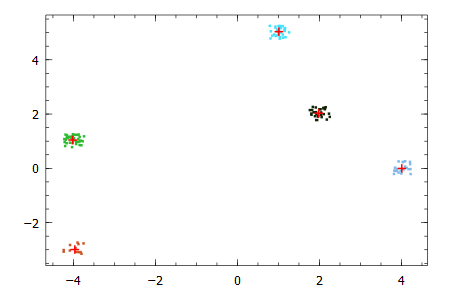

In [14]:
plotKmeansresult(out,X1)

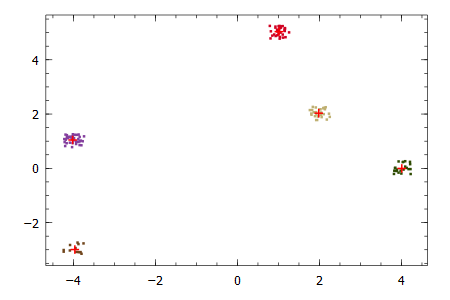

In [15]:
out=kmeans(X1,k,init=:kmpp)
plotKmeansresult(out,X1)

### Example - Concentric rings

The k-means algorithm works well if clusters can be separated by hyperplanes. In this example it is not the case.

In [16]:
# Number of rings, try also k=3
k=2
# Center
center=[rand(-5:5);rand(-5:5)]
# Radii
radii=randperm(10)[1:k]
# Number of points in circles
sizes=rand(1000:2000,k)
center,radii,sizes

([-5,4],[9,3],[1480,1754])

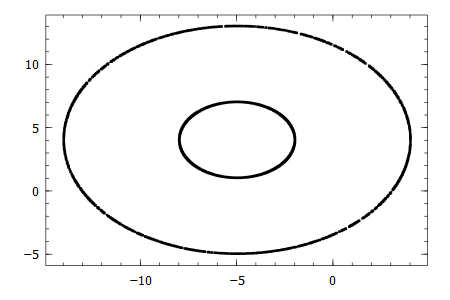

In [17]:
# Points
X=Array(Float64,2,sum(sizes))
first=0
last=0
for j=1:k
    first=last+1
    last=last+sizes[j]
    # Random angles
    ϕ=2*π*rand(sizes[j])
    for i=first:last
        l=i-first+1
        X[:,i]=center+radii[j]*[cos(ϕ[l]);sin(ϕ[l])]+(rand(2)-0.5)/50
    end
end
plot(X[1,:],X[2,:],".")

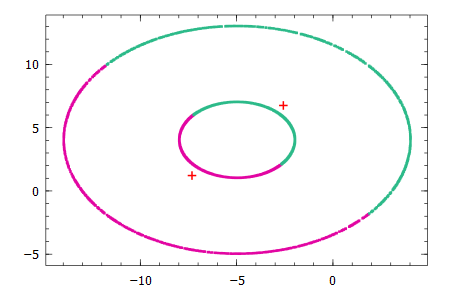

In [18]:
out=kmeans(X,k)
plotKmeansresult(out,X)